Hello! Please provide your user name so the necessary files on this computer can be accessed.


 rveenstra


Please provide the name of a nitrate datasheet:


 LIF Ashland Nit 12-13-18


  Sample Name  410 nm   [A]
0         1_1         0.004
1         1_2         0.003
2         2_1         0.001
3         2_2         0.003
4        0.00         0.006
Please provide the name of the corresponding ureide datasheet:


 LIF Ashland 11-15-18


  Sample Name  535 nm   [A]
0         1_1         0.008
1         1_2         0.005
2         2_1         0.004
3         2_2         0.005
4        0.00         0.003
Nitrate Calibration Curve


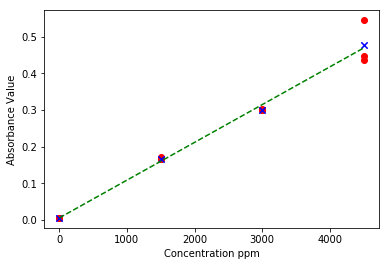

absorbance = 0.000103(concentration) + 0.005967
concentration = (absorbance - 0.005967) / 0.000103
Ureide Calibration Curve


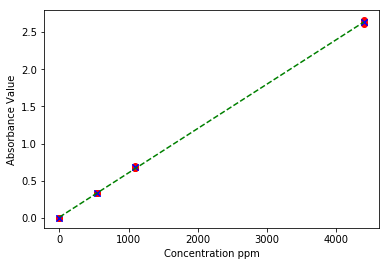

absorbance = 0.000596(concentration) + 0.012321
concentration = (absorbance - 0.012321) / 0.000596


In [4]:
import glob
import pandas as pd
import numpy
import matplotlib.pylab as plt
import scipy
import pylab

print("Hello! Please provide your user name so the necessary files on this computer can be accessed.")
user_name = input()

data_file_n = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Nitrates'

glob.os.chdir(data_file_n)

print("Please provide the name of a nitrate datasheet:")
n_data = input()

nit_df = pd.read_csv(str(n_data) + '.csv')
print(nit_df.head(5))

data_file_u = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Ureides'

glob.os.chdir(data_file_u)

print('Please provide the name of the corresponding ureide datasheet:')
u_data = input()

ur_df = pd.read_csv(str(u_data) + '.csv')
print(ur_df.head(5))

#### NITRATE FILE

nit_df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

nit_g = nit_df.groupby('ID')

nit_final=nit_df.merge(nit_g.mean(),on='ID')
nit_final2=nit_final.merge(abs(nit_g.max()-nit_g.min())/nit_g.max(), on='ID')
nit_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

c = (0,0,0,1500,1500,1500,3000,3000,3000,4500,4500,4500)
a = nit_final2.iloc[4:16, 1]
m = nit_final2.iloc[4:16, 2]

pylab.plot(c, a, "ro")
pylab.plot(c, m,'bx')
pylab.ylabel("Absorbance Value")
pylab.xlabel("Concentration ppm")

z = numpy.polyfit(c, m, 1, rcond=None, full=False, w=None, cov=False)
p = numpy.poly1d(z)
pylab.plot(c, p(c),"g--")
print("Nitrate Calibration Curve")
pylab.show()
print("absorbance = %.6f(concentration) + %.6f"%(z[0],z[1]))
print("concentration = (absorbance - %.6f) / %.6f"%(z[1],z[0]))

x=z[1]
y=z[0]

Concentration = []

for key, row in nit_final2.iterrows():
    if float(row['Var']) > 0.1:
        Concentration.append('Error')
    else:
        Concentration.append(((float(row['Mean']) -x)/y).round(3))
        
nit_final2["Concentration"] = Concentration
nit_final2
Nitrate_final = nit_final2.drop(nit_final2.columns[[1, 2, 3]], axis=1)

#### UREIDE FILE

ur_df.rename(columns = {'Sample Name':'ID', '535 nm   [A]':'B'}, inplace=True)

ur_g = ur_df.groupby('ID')

ur_final=ur_df.merge(ur_g.mean(),on='ID')
ur_final2=ur_final.merge(abs(ur_g.max()-ur_g.min())/ur_g.max(), on='ID')
ur_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

c_u = (0,0,0,549.6,549.6,549.6,1099.2,1099.2,1099.2,4400,4400,4400)
a_u = ur_final2.iloc[4:16, 1]
m_u = ur_final2.iloc[4:16, 2]

pylab.plot(c_u, a_u, "ro")
pylab.plot(c_u, m_u,'bx')
pylab.ylabel("Absorbance Value")
pylab.xlabel("Concentration ppm")

z_u = numpy.polyfit(c_u, m_u, 1, rcond=None, full=False, w=None, cov=False)
p_u = numpy.poly1d(z_u)
pylab.plot(c_u, p_u(c_u),"g--")
print("Ureide Calibration Curve")
pylab.show()
print("absorbance = %.6f(concentration) + %.6f"%(z_u[0],z_u[1]))
print("concentration = (absorbance - %.6f) / %.6f"%(z_u[1],z_u[0]))

x_u=z_u[1]
y_u=z_u[0]

Concentration_u = []

for key, row in ur_final2.iterrows():
    if float(row['Var']) > 0.1:
        Concentration_u.append('Error')
    else:
        Concentration_u.append(((float(row['Mean']) -x_u)/y_u).round(3))
        
ur_final2["Concentration"] = Concentration_u
ur_final2
Ureide_final = ur_final2.drop(ur_final2.columns[[1, 2, 3]], axis=1)

In [5]:
Complete_UN = Ureide_final.merge(Nitrate_final, on='ID')
Complete_UN.rename(columns = {'Concentration_x':'Conc_Ureides', 'Concentration_y':'Conc_Nitrates'}, inplace=True)
Complete_UN

RAU = []

for key, row in Complete_UN.iterrows():
    if str(row['Conc_Ureides']) == "Error":
        RAU.append("Error")
    elif str(row['Conc_Nitrates']) == "Error":
        RAU.append("Error")
    else:
        RAU.append((float(row['Conc_Ureides'])*4)/(float(row['Conc_Ureides'])*4 + float(row["Conc_Nitrates"])))

Complete_UN["RAU"] = RAU
Complete_UN

FINAL_RAU = Complete_UN.drop_duplicates(subset=['ID'])
FINAL_RAU

,ID,Conc_Ureides,Conc_Nitrates,RAU
0,1_1,-7.25,-19.098,0.602936
1,1_2,-12.284,-28.809,0.630393
2,2_1,-13.962,-48.23,0.536598
3,2_2,-12.284,-28.809,0.630393
4,0.00,Error,0.324,Error
13,1500.0,548.124,1570.24,0.582686
22,3000.0,1122.52,2858.55,0.611008
31,4500.0,4394.36,Error,Error
40,LIF-241,933.195,11468.8,0.245552
44,LIF-242,834.201,10837.6,0.23541


In [6]:
Nitrate_final

,ID,Concentration
0,1_1,-19.098
1,1_2,-28.809
2,2_1,-48.23
3,2_2,-28.809
4,0.00,0.324
5,0.00,0.324
6,0.00,0.324
7,1500.0,1570.24
8,1500.0,1570.24
9,1500.0,1570.24
